# 시계열 데이터 특징

### 시계열 패턴

- 추세(Trend) : 데이터가 장기적으로 증가하거나 감소할때, 추세(trend)가 존재한다. 반드시 선형적일 필요는 없다.
- 계절성(Seasonality) : 해마다 어떤 특정한 때나 1주일 마다 특정 요일에 나타나는 것 같은 계절성 요인이 시계열에 영향을 줄 때 계절성 패턴이 나타난다. 계절성은 빈도의 형태로 나타 나는데,그 빈도는 항상 일정하며 알려져 있다.
- 주기성(Cycle) : 고정된 빈도가 아닌 형태로 증가나 감소 하는 모습을 보일 때 주기가 나타난다.보통 이러한 요동은 경제상황 때문에 일어나고, 흔히 경기순환 과 관련이 있다.보통 이러한 요동의 지속기간 은적어도 2년 이상이다.

### 계절성과 주기성 구분
일정한 빈도로 나타나지 않은 요동은 주기적이다. 빈도가 변하지 않고 연중 어떤시기 와 연관되어 있다면 계절성이다. 일반적으로, 주기들의 평균길이는 계절성 패턴의 길이 보다 길고,주기의 크기는 계절적 패턴의 크기보다 좀 더 변동성이 큰 경향이있다.

예를들어 금융위기는 특정 기간마다 나타나는것이 아니며 고정되지 않은 빈도로 나타나고, 우산의 판매량의 경우 매해 여름 장마기간과 가까운 월에 많이 팔리며, 이것이 계절성이다. 즉, 주기성이 패턴의 길이가 길 수 밖에없다.

많은 시계열 에는 추세(trend), 계절성(seasonality), 주기(cycle)가 있다. 예측기법을 고를 때,먼저 데이터 에서 나타나는 시계열 패턴을 살펴 보고, 그 다음 적절하게 패턴을 잡아 낼.  수 있는 기법을 선택 해야한다.

# *계절성 예시*

# Monthly Data
- 호주 당뇨병 치료약(anti-diabetic) 월별 Sales 데이터 사용 예정 
https://raw.githubusercontent.com/selva86/datasets/master/a10.csv
- 모든 회사에 있는 월별 매출, 가입자, 등 실적 데이터에 활용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- 데이터 불러오기. plottig. 

- 계절요인 분리. Trend, Seasonl, residual을 포함하는 테이블 생성. 
- Insight 도출
  1. 월평균 성장율 
  2. Seasonal 요소 분석
  3. residual 증감 여부 

In [2]:
# 데이터 로딩
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


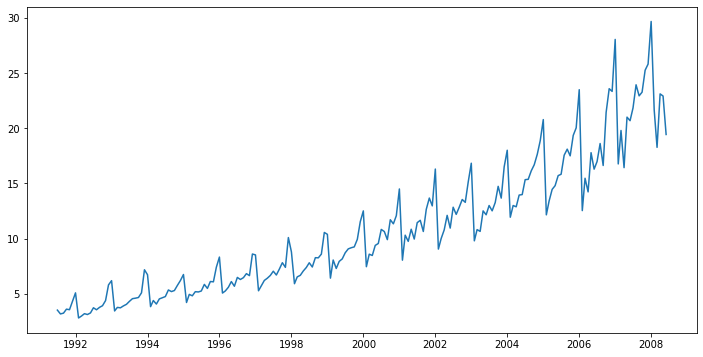

In [3]:
# 시각화
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df.value)

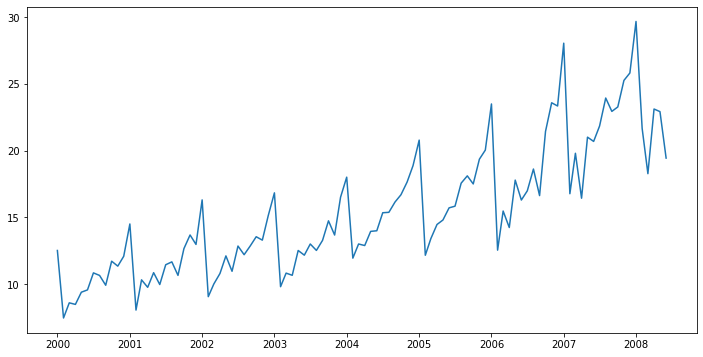

In [4]:
# 인덱스 범위재설정 후 시각화
df=df[df.index>'1999-12-31']
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df.value)

### 레이더차트

In [ ]:
# 레이더 차트를 만들 데이터 copy
data = df.copy()

# 년도, 월 분리
data['year'] = data.index.year
data['month'] = data.index.month

# 데이터 재배치
data= data.reset_index(drop = True)[['year','month','value']]

In [ ]:
# 데이터 피벗팅
data = data.pivot(index = 'year',columns = 'month', values = 'value')

In [ ]:
data = data.iloc[:-1,:]

In [ ]:
data

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2000,12.511462,7.457199,8.591191,8.474000,9.386803,9.560399,10.834295,10.643751,9.908162,11.710041,11.340151,12.079132
2001,14.497581,8.049275,10.312891,9.753358,10.850382,9.961719,11.443601,11.659239,10.647060,12.652134,13.674466,12.965735
2002,16.300269,9.053485,10.002449,10.788750,12.106705,10.954101,12.844566,12.196500,12.854748,13.542004,13.287640,15.134918
2003,16.828350,9.800215,10.816994,10.654223,12.512323,12.161210,12.998046,12.517276,13.268658,14.733622,13.669382,16.503966
2004,18.003768,11.938030,12.997900,12.882645,13.943447,13.989472,15.339097,15.370764,16.142005,16.685754,17.636728,18.869325
2005,20.778723,12.154552,13.402392,14.459239,14.795102,15.705248,15.829550,17.554701,18.100864,17.496668,19.347265,20.031291
2006,23.486694,12.536987,15.467018,14.233539,17.783058,16.291602,16.980282,18.612189,16.623343,21.430241,23.575517,23.334206
2007,28.038383,16.763869,19.792754,16.427305,21.000742,20.681002,21.834890,23.930204,22.930357,23.263340,25.250030,25.806090


In [ ]:
my_palette

In [ ]:
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


labels = data.columns
num_labels = len(labels)

angels = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angels += angels[:1]

my_palette = plt.cm.get_cmap("Set2", len(data.index))

fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')

for i, row in data.iterrows():
    color = my_palette(i)
    df = data.iloc[i].drop('year').tolist()
    df += df[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,10)
    
    ax.plot(angles, df, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, df, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.Character, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

IndexError: ignored

<Figure size 1080x1440 with 0 Axes>

In [ ]:
|

In [5]:
# seasonal_decompose메서드 사용
result= seasonal_decompose(df, model='additive', two_sided=False)

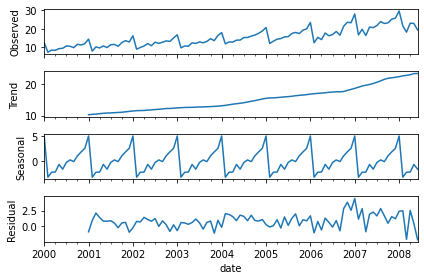

In [6]:
result.plot()
plt.show()

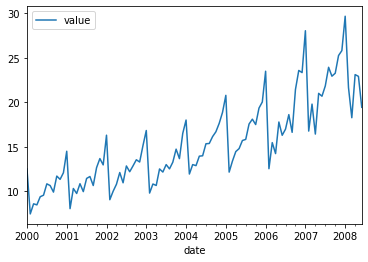

In [8]:
result.observed.plot()

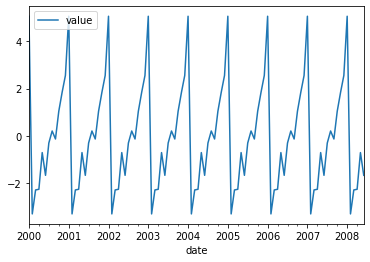

In [9]:
result.seasonal.plot()

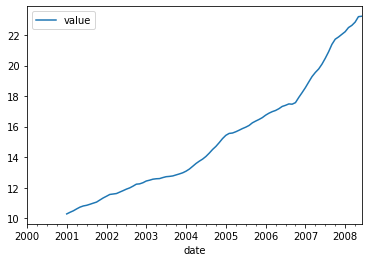

In [10]:
result.trend.plot()

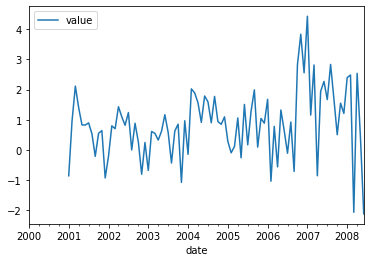

In [11]:
result.resid.plot()

In [7]:
df_re=pd.concat([result.observed, result.trend, result.seasonal, result.resid], axis=1)

In [8]:
df_re.columns=['obs', 'trend', 'seasonal', 'resid']
df_re.dropna(inplace=True)

In [9]:
df_re.head(24)
df_re['year']=df_re.index.year

In [10]:
df_re.head()

,obs,trend,seasonal,resid,year
date,,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590,2001
2001-02-01,8.049275,10.398229,-3.307973,0.959019,2001
2001-03-01,10.312891,10.494636,-2.293969,2.112225,2001
2001-04-01,9.753358,10.619680,-2.264396,1.398075,2001
2001-05-01,10.850382,10.733969,-0.711368,0.827781,2001


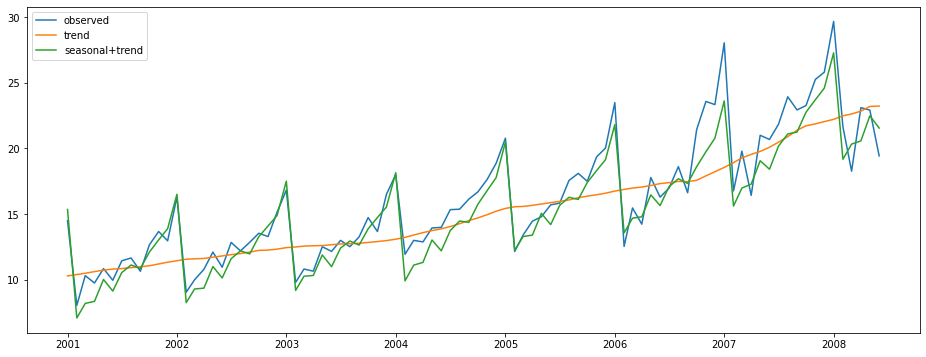

In [11]:
plt.figure(figsize=(16,6))
plt.plot(df_re.obs)
plt.plot(df_re.trend)
plt.plot(df_re.seasonal+df_re.trend)
plt.legend(['observed', 'trend', 'seasonal+trend'])
plt.show()
# 2006년 2007년에는 ordinary한 cycle에서 벗어나는 경향이 있다. (residual 크다. )

seasonal + trend를 하는 이유는 계절성의 모습에서 trend를 더해주면 실제값이고 여기에 추가로 잔차 residual을 더해준다면 관측 데이터와 동일해진다.

In [ ]:
df_re.index[0]
def get_date(date):
  return (str(date.year)+'-'+str(date.month))



In [ ]:
get_date(df_re.index[0])

'2001-1'

[Text(0, 0, '2001-1'),
 Text(0, 0, '2001-2'),
 Text(0, 0, '2001-3'),
 Text(0, 0, '2001-4'),
 Text(0, 0, '2001-5'),
 Text(0, 0, '2001-6'),
 Text(0, 0, '2001-7'),
 Text(0, 0, '2001-8'),
 Text(0, 0, '2001-9'),
 Text(0, 0, '2001-10'),
 Text(0, 0, '2001-11'),
 Text(0, 0, '2001-12'),
 Text(0, 0, '2002-1'),
 Text(0, 0, '2002-2'),
 Text(0, 0, '2002-3'),
 Text(0, 0, '2002-4'),
 Text(0, 0, '2002-5'),
 Text(0, 0, '2002-6'),
 Text(0, 0, '2002-7'),
 Text(0, 0, '2002-8'),
 Text(0, 0, '2002-9'),
 Text(0, 0, '2002-10'),
 Text(0, 0, '2002-11'),
 Text(0, 0, '2002-12'),
 Text(0, 0, '2003-1'),
 Text(0, 0, '2003-2'),
 Text(0, 0, '2003-3'),
 Text(0, 0, '2003-4'),
 Text(0, 0, '2003-5'),
 Text(0, 0, '2003-6'),
 Text(0, 0, '2003-7'),
 Text(0, 0, '2003-8'),
 Text(0, 0, '2003-9'),
 Text(0, 0, '2003-10'),
 Text(0, 0, '2003-11'),
 Text(0, 0, '2003-12'),
 Text(0, 0, '2004-1'),
 Text(0, 0, '2004-2'),
 Text(0, 0, '2004-3'),
 Text(0, 0, '2004-4'),
 Text(0, 0, '2004-5'),
 Text(0, 0, '2004-6'),
 Text(0, 0, '2004-7'),
 T

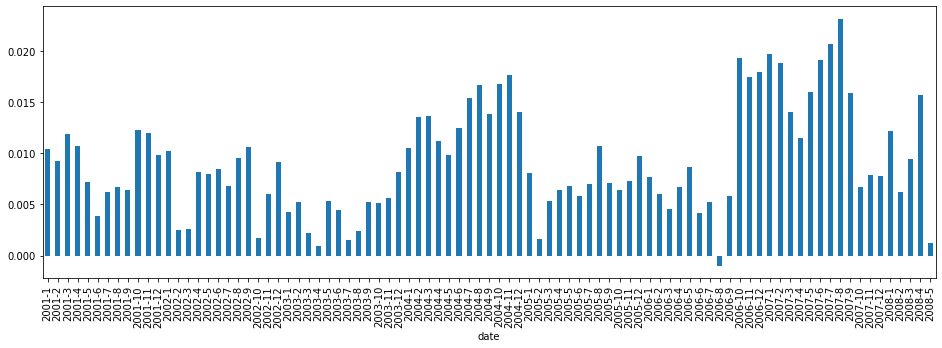

In [ ]:
# trend
ax=df_re.trend.pct_change().dropna().plot(kind='bar', figsize=(16,5))
ax.set_xticklabels(list(map(lambda x: get_date(x), df_re.index  )))

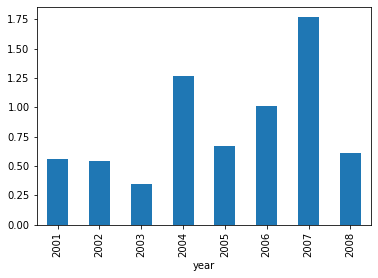

In [ ]:
# residual : unexpected 값들이다.
df_re.groupby('year')['resid'].mean().plot(kind='bar')
